<a href="https://colab.research.google.com/github/sanvirrafsaan/Data-Science-Portfolio/blob/main/Churn-prediction/notebooks/02_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import sys
from pathlib import Path

%cd /content
!rm -rf Data-Science-Portfolio
!git clone -q https://github.com/sanvirrafsaan/Data-Science-Portfolio.git
%cd /content/Data-Science-Portfolio/Churn-prediction

assert Path("pyproject.toml").exists()
assert Path("src/churn").exists()

!{sys.executable} -m pip -q install -e . --no-cache-dir

# Add the src directory to sys.path so the 'churn' module can be found
sys.path.insert(0, str(Path("src").resolve()))

import churn
from churn import utils, paths
print("✅ churn:", churn.__file__)
print("✅ utils:", utils.__file__)
print("✅ paths:", paths.__file__)

/content
/content/Data-Science-Portfolio/Churn-prediction
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for churn (pyproject.toml) ... done
✅ churn: /content/Data-Science-Portfolio/Churn-prediction/src/churn/__init__.py
✅ utils: /content/Data-Science-Portfolio/Churn-prediction/src/churn/utils.py
✅ paths: /content/Data-Science-Portfolio/Churn-prediction/src/churn/paths.py


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor
from churn.utils import best_grid_shape
from churn.paths import RAW_DIR, INTERIM_DIR

In [ ]:
import os
from pathlib import Path
from google.colab import drive


drive.mount('/content/drive')
PROJECT_ROOT = Path("/content/drive/MyDrive/Data Science Portfolio/churn-prediction")

# --- Paths ---
RAW_DIR = PROJECT_ROOT / "data" / "raw"
INTERIM_DIR = PROJECT_ROOT / "data" / "interim"
PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"
MODELS_DIR = PROJECT_ROOT / "models"
FIGURES_DIR = PROJECT_ROOT / "reports" / "figures"

# --- Ensure directories exist ---
for p in [RAW_DIR, INTERIM_DIR, PROCESSED_DIR, MODELS_DIR, FIGURES_DIR]:
    p.mkdir(parents=True, exist_ok=True)

# --- Debug ---
print("Running in Colab:", IN_COLAB)
print("Project root:", PROJECT_ROOT)
print("Interim contents:", [x.name for x in INTERIM_DIR.iterdir()])


Mounted at /content/drive
Running in Colab: True
Project root: /content/drive/MyDrive/Data Science Portfolio/churn-prediction
Interim contents: ['interim_data.parquet']


In [ ]:
df = pd.read_parquet(f"{INTERIM_DIR}/interim_data.parquet")
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   Gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   Tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [ ]:
df['Contract'].unique()

['Month-to-month', 'One year', 'Two year']
Categories (3, object): ['Month-to-month', 'One year', 'Two year']

#Numeric Columns
Next, lets look at the numeric columns and their relationship to the churn rate

In [20]:
numeric_features = sorted(df.select_dtypes(include="number").columns.to_list())

target = "Churn"

id_column = "customerID"

categorical_features = sorted(
    df.select_dtypes(include="category").columns.drop([target]).to_list()
)

Figure(1650x500)
[<Axes: > <Axes: > <Axes: >]


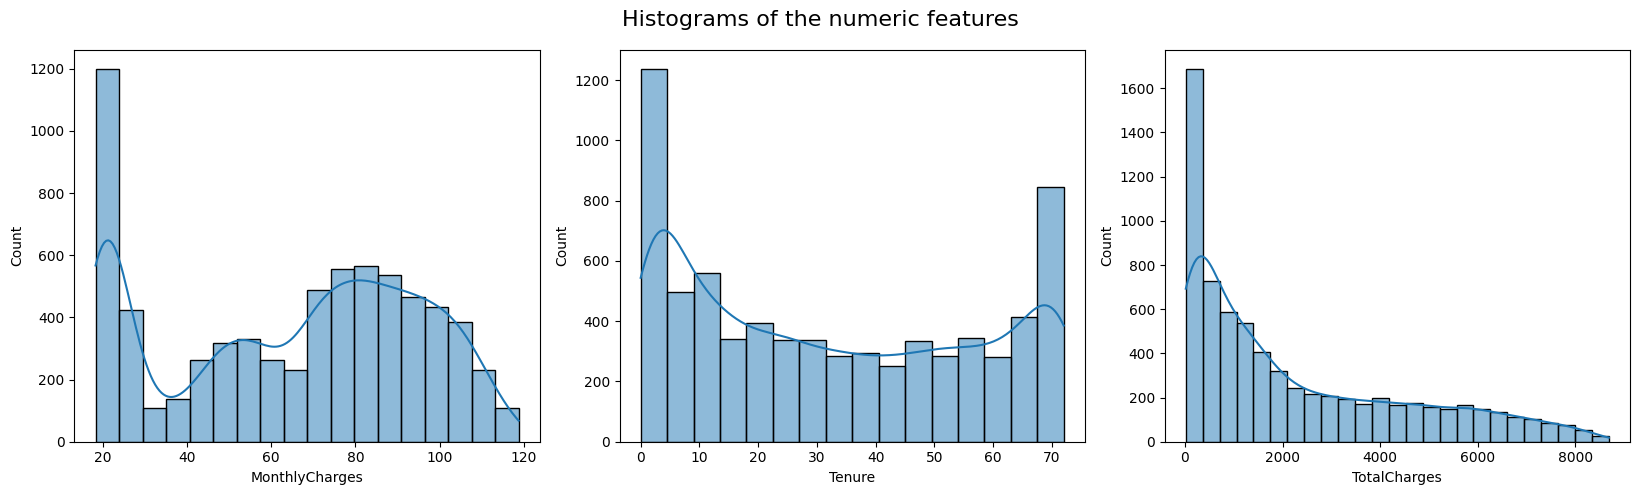

In [39]:
rows, cols = best_grid_shape(len(numeric_features))
#output row = 1, column = 3

fig, axs = plt.subplots(
    rows,
    cols,
    figsize=(5.5 * cols, 5 * rows),
    tight_layout=True,
)
print(fig)
print(axs)

for ax, column in zip(axs.ravel(), numeric_features):
    sns.histplot(
        data=df,
        x=column,
        ax=ax,
        kde=True,
    )

fig.suptitle("Histograms of the numeric features", fontsize=16)
plt.show()

We can see that most customers have been with the company for a very low tenure, in turn also accumulating low monthly and total charges. Many customers however have also been with the company for the longest period possible, 72 months (maximum value). This can be related to another variable, such as the kind of contracts that the people are on.

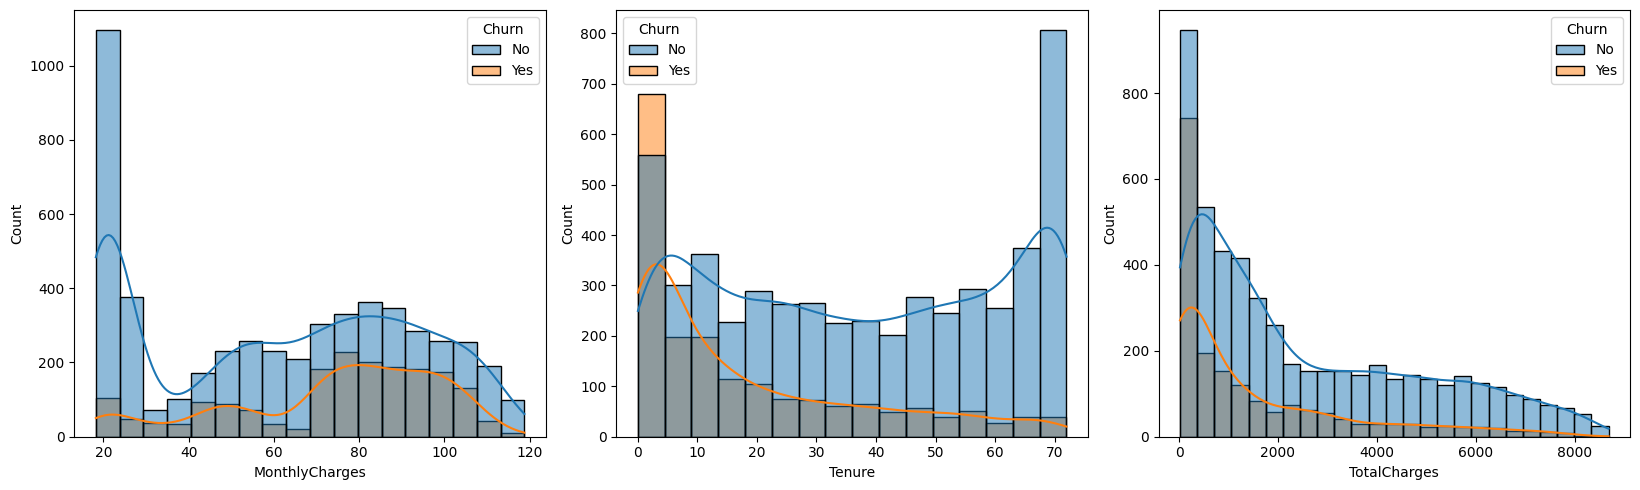

In [52]:
row, col = best_grid_shape(len(numeric_features))
fig, axs = plt.subplots(
    row, col, figsize = (5.5 * col, 5 * row), tight_layout = True
)

for ax, column in zip(axs.ravel(), numeric_features):
  h = sns.histplot(
      data = df,
      x = column,
      ax = ax,
      kde= True,
      hue = target,
  )


We can see some interesting patterns. Short tenure customers have higher churn rates, and Longest tenure customers have very low churn rate. Furthermore, churn rate is also higher for customers with high monthly charges ranging around 70-100.

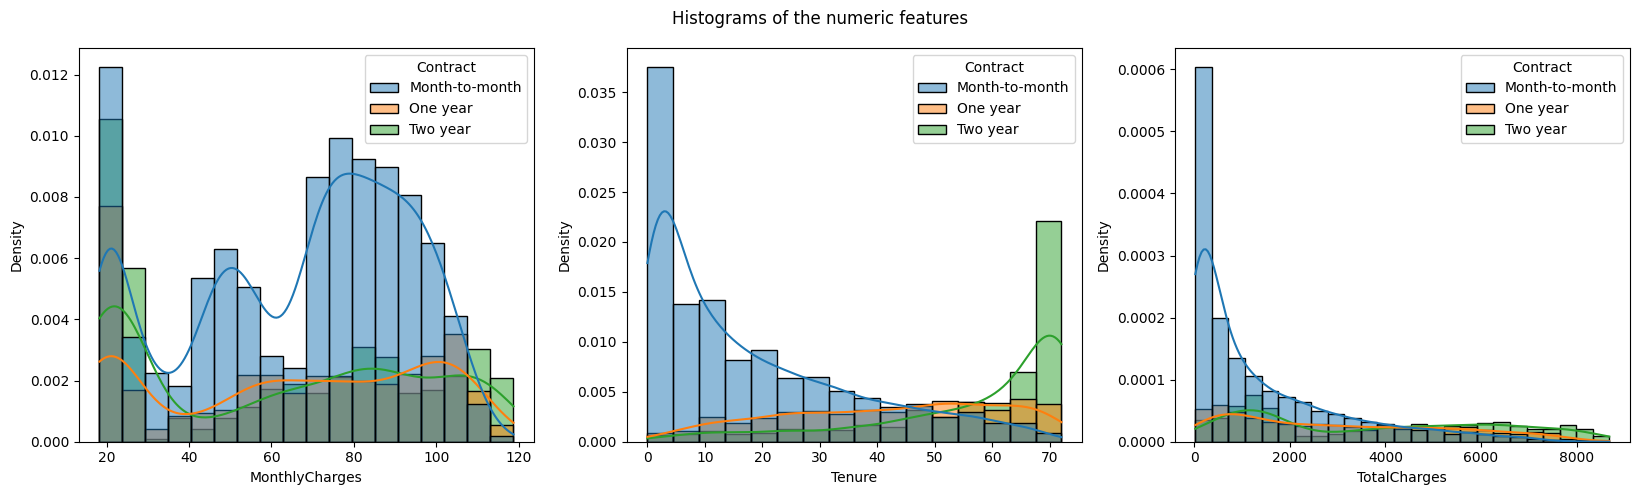

In [60]:
row, col = best_grid_shape(len(numeric_features))
fig, axs = plt.subplots(
    row, col, figsize = (5.5 * col, 5 * row), tight_layout = True
)

for ax, column in zip(axs.ravel(), numeric_features):
  h = sns.histplot(
      data = df,
      x = column,
      ax = ax,
      kde= True,
      hue = "Contract",
      stat = "density",
  )
fig.suptitle("Histograms of the numeric features")

plt.show()

We can see that people with the lowest tenure (correlated with higher churn) are on a month-to-month contract, and the people with the highest tenures are on two year contracts. This implies that customers with a greater commitment at the beginning, tend to stay with the company for a longer period of time. This can potentially be because customers get used to their contract, and feel more resistance towards switching anywhere else.